In [539]:
import numpy as np
import pandas as pd
import re
import warnings
warnings.filterwarnings('ignore')

In [540]:
#load in the dataset from github
movies = pd.read_csv('https://raw.githubusercontent.com/DeeeTeeee/Datasets/main/DirtyDatasets/movies.csv')
movies

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced into action when a group of terrorists attempt to hijack a transatlantic overnight flight.,"\n Director:\nPeter Thorwarth\n| \n Stars:\nPeri Baumeister, \nCarl Anton Koch, \nAlexander Scheer, \nKais Setti\n","21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may be the final battle between He-Man and Skeletor. A new animated series from writer-director Kevin Smith.,"\n \n Stars:\nChris Wood, \nSarah Michelle Gellar, \nLena Headey, \nMark Hamill\n","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a coma to learn the world is in ruins and must lead a group of survivors to stay alive.,"\n \n Stars:\nAndrew Lincoln, \nNorman Reedus, \nMelissa McBride, \nLauren Cohan\n","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits of a super scientist and his not-so-bright grandson.,"\n \n Stars:\nJustin Roiland, \nChris Parnell, \nSpencer Grammer, \nSarah Chalke\n","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of the Dead, which focuses on German safecracker Ludwig Dieter leading a group of aspiring thieves on a top secret heist during the early stages of the zombie apocalypse.","\n Director:\nMatthias Schweighöfer\n| \n Stars:\nMatthias Schweighöfer, \nNathalie Emmanuel, \nRuby O. Fee, \nStuart Martin\n",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9994,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,"\n \n Stars:\nMorgan Taylor Campbell, \nChris Cope, \nIñaki Godoy, \nRhianna Jagpal\n",NaN,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n Star:\nPrince Harry\n,NaN,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,"\n Director:\nJovanka Vuckovic\n| \n Stars:\nMorgan Taylor Campbell, \nIñaki Godoy, \nRhianna Jagpal, \nSiddhartha Minhas\n",NaN,NaN,NaN


I will like to check the shape of the dataset

In [541]:
movies.shape

(9999, 9)

In [542]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [543]:
movies.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

we can see there are lots of `null` values in the dataset, its one of the major this we are cleaning.


Let me first remove all the '\n's in the dataset

In [544]:
# Remove '\n' characters from all columns
movies = movies.replace(r'\n', ' ', regex=True)

Let me check for duplicates rows:


In [545]:

# Count duplicate rows
duplicate_count = len(movies[movies.duplicated()])

# Print the count of duplicate rows
print(f"Number of duplicate rows in the 'movies' dataset: {duplicate_count}")


Number of duplicate rows in the 'movies' dataset: 431


In [546]:
# Check for duplicate rows
duplicate_rows = movies[movies.duplicated()]

In [547]:
duplicate_rows

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
6833,Mighty Little Bheem,(2019– ),"Animation, Short, Adventure",NaN,Add a Plot,"Directors: Rajiv Chilaka, Krishna Mohan Chintapatla",NaN,NaN,NaN
6835,Mighty Little Bheem,(2019– ),"Animation, Short, Adventure",9.0,Add a Plot,"Directors: Rajiv Chilaka, Krishna Mohan Chintapatla",6,NaN,NaN
6836,Mighty Little Bheem,(2019– ),"Animation, Short, Adventure",9.0,Add a Plot,"Directors: Rajiv Chilaka, Krishna Mohan Chintapatla",6,NaN,NaN
6837,Mighty Little Bheem,(2019– ),"Animation, Short, Adventure",NaN,Add a Plot,"Directors: Rajiv Chilaka, Krishna Mohan Chintapatla",NaN,NaN,NaN
6838,Mighty Little Bheem,(2019– ),"Animation, Short, Adventure",NaN,Add a Plot,"Directors: Rajiv Chilaka, Krishna Mohan Chintapatla",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9989,1899,(2022– ),"Drama, History, Horror",NaN,Add a Plot,Director: Baran bo Odar,NaN,NaN,NaN
9990,1899,(2022– ),"Drama, History, Horror",NaN,Add a Plot,Director: Baran bo Odar,NaN,NaN,NaN
9991,1899,(2022– ),"Drama, History, Horror",NaN,Add a Plot,Director: Baran bo Odar,NaN,NaN,NaN
9992,1899,(2022– ),"Drama, History, Horror",NaN,Add a Plot,Director: Baran bo Odar,NaN,NaN,NaN


I will drop all duplicates;

In [548]:
# Drop duplicate rows
movies = movies.drop_duplicates()

In [549]:
# Print the count of duplicate rows
print(f"Number of duplicate rows in the 'movies' dataset: {movies.duplicated().sum()}")

Number of duplicate rows in the 'movies' dataset: 0


Ok, I will love to work on each column one after the other


In [550]:
movies.MOVIES.value_counts

<bound method IndexOpsMixin.value_counts of 0                             Blood Red Sky
1       Masters of the Universe: Revelation
2                          The Walking Dead
3                            Rick and Morty
4                           Army of Thieves
                       ...                 
9993                              Totenfrau
9995                                 Arcane
9996                      Heart of Invictus
9997                         The Imperfects
9998                         The Imperfects
Name: MOVIES, Length: 9568, dtype: object>

### `MOVIES`

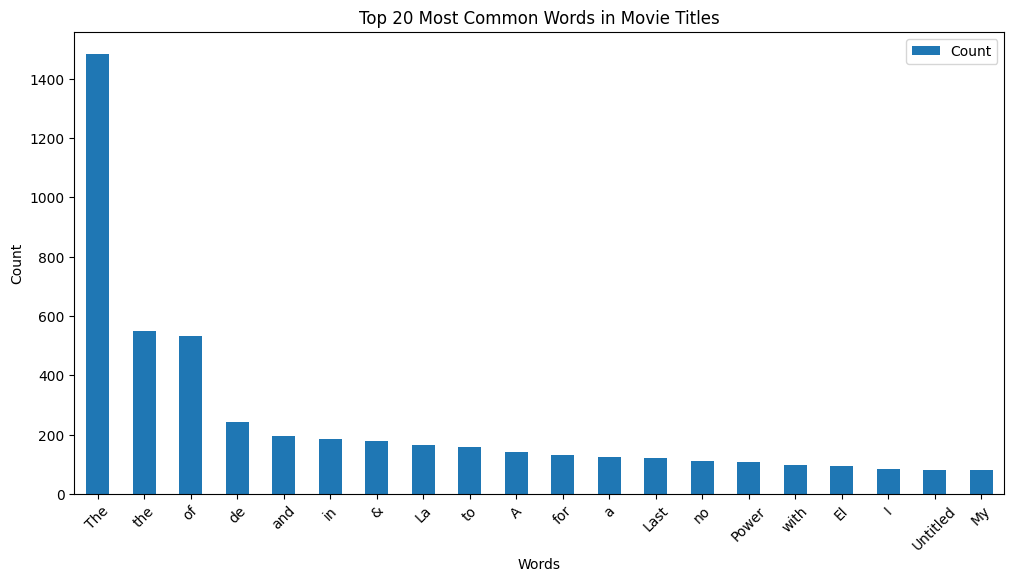

In [551]:
# Tokenize movie titles (split into individual words)
movie_titles = movies['MOVIES'].str.split()

# Flatten the list of tokens
tokens = [word for sublist in movie_titles for word in sublist]

# Count the frequency of each word
word_counts = Counter(tokens)

# Convert the word counts to a DataFrame for easier manipulation
word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index', columns=['Count'])

# Sort the words by count in descending order
word_counts_df = word_counts_df.sort_values(by='Count', ascending=False)

# Plot the top N words (e.g., top 20)
top_N = 20
word_counts_df.head(top_N).plot(kind='bar', figsize=(12, 6))
plt.title(f"Top {top_N} Most Common Words in Movie Titles")
plt.xlabel("Words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


I want to see other symbols that are in the column that are not to be there:

In [552]:
# Define a regular expression pattern to match symbols you want to exclude
# For example, to exclude '#' and any non-alphanumeric characters:
exclude_pattern = r'([^a-zA-Z0-9\s]+)'

# Apply the regular expression pattern to the 'MOVIES' column
matches = movies['MOVIES'].str.extractall(exclude_pattern)

# Get unique symbols from the matches
symbols_to_exclude = matches[0].unique()

# Print the list of symbols to exclude
print("Symbols that shouldn't be in movie titles:")
for symbol in symbols_to_exclude:
    print(symbol)

Symbols that shouldn't be in movie titles:
:
/
'
-
(
)
É
î
ô
.
,
&
.'
û
é
!
***
è
!!
¿
ó
?
â
;
Ó
æ
ð
ç
#
~
%
ô-
...
**
----
ê
í
ñ
È
ö
à
!!!
á
ô:
ë
.:
²
ø
_
ù
Â
Ô
+
ú
ä
ü
ü?
ï
å
>
[
]
ã
Ò
ò
û:
Á
Ö
·
Ç
?!
üçü
Ü
çõ
ª
ñí
¡
çã
*
"
@
=
..
******
À
!:
ú:
é,
é!:
..?
Í
²:
Å
..!


we can see they are so many and its obvious they shouldnt be there:

In [553]:
symbols_to_exclude

array([':', '/', "'", '-', '(', ')', 'É', 'î', 'ô', '.', ',', '&', ".'",
       'û', 'é', '!', '***', 'è', '!!', '¿', 'ó', '?', 'â', ';', 'Ó', 'æ',
       'ð', 'ç', '#', '~', '%', 'ô-', '...', '**', '----', 'ê', 'í', 'ñ',
       'È', 'ö', 'à', '!!!', 'á', 'ô:', 'ë', '.:', '²', 'ø', '_', 'ù',
       'Â', 'Ô', '+', 'ú', 'ä', 'ü', 'ü?', 'ï', 'å', '>', '[', ']', 'ã',
       'Ò', 'ò', 'û:', 'Á', 'Ö', '·', 'Ç', '?!', 'üçü', 'Ü', 'çõ', 'ª',
       'ñí', '¡', 'çã', '*', '"', '@', '=', '..', '******', 'À', '!:',
       'ú:', 'é,', 'é!:', '..?', 'Í', '²:', 'Å', '..!'], dtype=object)

In [554]:
# Define the list of symbols to remove
symbols_to_remove = symbols_to_exclude.tolist()

# Escape special characters in the symbols
symbols_to_remove_escaped = [re.escape(symbol) for symbol in symbols_to_remove]

# Remove symbols from the 'MOVIES' column
for symbol in symbols_to_remove_escaped:
    movies['MOVIES'] = movies['MOVIES'].str.replace(symbol, '')

## `YEAR`

In [555]:
movies.YEAR.value_counts

<bound method IndexOpsMixin.value_counts of 0            (2021)
1          (2021– )
2       (2010–2022)
3          (2013– )
4            (2021)
           ...     
9993       (2022– )
9995       (2021– )
9996       (2022– )
9997       (2021– )
9998       (2021– )
Name: YEAR, Length: 9568, dtype: object>

In [556]:
# Extract valid years and convert them to a consistent format
movies['YEAR'] = movies['YEAR'].str.extract(r'(\d{4})', expand=False)

# Convert the 'YEAR' column to numeric, treating invalid values as NaN
movies['YEAR'] = pd.to_numeric(movies['YEAR'], errors='coerce')

# Change the 'YEAR' column data type to object (string)
movies['YEAR'] = movies['YEAR'].astype(str)

In [557]:
movies.YEAR.dtype

dtype('O')

## `GENRE`

In [558]:
movies.GENRE

0            Action, Horror, Thriller            
1        Animation, Action, Adventure            
2             Drama, Horror, Thriller            
3        Animation, Adventure, Comedy            
4               Action, Crime, Horror            
                          ...                    
9993                  Drama, Thriller            
9995     Animation, Action, Adventure            
9996               Documentary, Sport            
9997        Adventure, Drama, Fantasy            
9998        Adventure, Drama, Fantasy            
Name: GENRE, Length: 9568, dtype: object

In [559]:
# Clean and normalize the 'GENRE' column
movies['GENRE'] = movies['GENRE'].str.strip()  # Remove leading/trailing spaces
movies['GENRE'] = movies['GENRE'].str.lower()  # Convert to lowercase

# Split the comma-separated genres and create a list of all genres
genre_lists = movies['GENRE'].str.split(', ')

# Flatten the list of genres
all_genres = [genre for sublist in genre_lists.dropna() for genre in sublist]

# Count the frequency of each genre
genre_counts = pd.Series(all_genres).value_counts()

# Print the top 10 most common genres
print("Top 10 Most Common Genres (Cleaned and Normalized):")
print(genre_counts.head(10))

Top 10 Most Common Genres (Cleaned and Normalized):
drama          4115
comedy         2736
action         2110
adventure      1588
animation      1584
crime          1519
documentary    1221
thriller        895
mystery         840
romance         835
dtype: int64


In [560]:
movies.GENRE

0           action, horror, thriller
1       animation, action, adventure
2            drama, horror, thriller
3       animation, adventure, comedy
4              action, crime, horror
                    ...             
9993                 drama, thriller
9995    animation, action, adventure
9996              documentary, sport
9997       adventure, drama, fantasy
9998       adventure, drama, fantasy
Name: GENRE, Length: 9568, dtype: object

Are there nulls in this column?

In [561]:
# Check for null values in the 'GENRE' column
null_count = movies['GENRE'].isnull().sum()

# Print the number of null values
print(f"Number of null values in the 'GENRE' column: {null_count}")

Number of null values in the 'GENRE' column: 78


In [562]:
# Remove rows with null values in the 'GENRE' column
movies = movies.dropna(subset=['GENRE'])

## `RATING`

Let me see if there are rows with values more than 10

In [563]:

# Filter rows with 'RATING' values greater than 10
rows_with_ratings_above_10 = movies[movies['RATING'] > 10]

# Check if there are any such rows
if not rows_with_ratings_above_10.empty:
    print("Rows with 'RATING' values greater than 10:")
    print(rows_with_ratings_above_10)
else:
    print("No rows with 'RATING' values greater than 10 found.")


No rows with 'RATING' values greater than 10 found.


Ok, thats cool, I will fill the `NaN` with 0

In [564]:
# # Calculate the mean rating (rounded to one decimal point)
# mean_rating = round(movies['RATING'].mean(), 1)

# Fill NaN values in the 'RATING' column with 0
movies['RATING'].fillna(0, inplace=True)

In [565]:
movies.RATING

0       6.1
1       5.0
2       8.2
3       9.2
4       0.0
       ... 
9993    0.0
9995    0.0
9996    0.0
9997    0.0
9998    0.0
Name: RATING, Length: 9490, dtype: float64

## `ONE-LINE`

First I will change this to `DESCRIPTION`

In [566]:
# Rename the 'ONE-LINE' column to 'DESCRIPTION'
movies.rename(columns={'ONE-LINE': 'DESCRIPTION'}, inplace=True)

In [567]:
movies.DESCRIPTION

0                                                                                     A woman with a mysterious illness is forced into action when a group of terrorists attempt to hijack a transatlantic overnight flight.
1                                                                      The war for Eternia begins again in what may be the final battle between He-Man and Skeletor. A new animated series from writer-director Kevin Smith.
2                                                                                           Sheriff Deputy Rick Grimes wakes up from a coma to learn the world is in ruins and must lead a group of survivors to stay alive.
3                                                                                                                          An animated series that follows the exploits of a super scientist and his not-so-bright grandson.
4        A prequel, set before the events of Army of the Dead, which focuses on German safecracker Ludwig Dieter lea

We can see there are lots of rows with 'Add a Plot' I will change that too to 'No Description Avalaible'

In [568]:

# Replace "Add a Plot" with "No Description Available" in the 'SUMMARY' column
movies['DESCRIPTION'] = movies['DESCRIPTION'].str.replace('Add a Plot', 'No Description Available')

## `STARS`

In [569]:

# Set the Pandas option to display more text in columns
pd.set_option('display.max_colwidth', None)


# Display the 'STARS' column with full text
print(movies['STARS'].sample(50))


1280                                                     Stars: Grzegorz Damiecki,  Agnieszka Grochowska,  Hubert Milkowski,  Wiktoria Filus 
6555              Directors: Noriyuki Abe,  Kôji Aritomi |      Stars: Masakazu Morita,  Fumiko Orikasa,  Noriaki Sugiyama,  Hiroki Yasumoto 
8008                                  Director: Alexandre Laurent |      Stars: Audrey Fleurot,  Julie De Bona,  Camille Lou,  Gilbert Melki 
9186                                              Director: Robyn Grace |      Stars: Russell Curry,  Hunter Deno,  Kainalu Moya,  Tessa Rao 
5210                                          Directors: Zhong Lei,  Yue Song |      Stars: Kang En,  Yang JunPing,  Becki Li,  Chang-Hai Li 
276                                 Director: Stanley Kubrick |      Stars: Keir Dullea,  Gary Lockwood,  William Sylvester,  Daniel Richter 
4701                                                           Stars: Alberto Collado,  Gonzalo Guzmán,  Arcelia Ramírez,  Karina Díaz López 
6196  

So, we can see that there are Stars and Director, I will remove Director since the column is named stars:

In [570]:
# Extract stars' names from the 'STARS' column (ignoring directors)
movies['STARS'] = movies['STARS'].str.replace('Director:', '')  # Remove "Director:" if present
movies['STARS'] = movies['STARS'].str.strip()  # Remove leading/trailing whitespace
movies['STARS'] = movies['STARS'].str.split('|').str[1].str.strip()  # Extract stars' names

In [571]:
# Remove "Stars: " prefix from all rows in the 'STARS' column
movies['STARS'] = movies['STARS'].str.replace('Stars: ', '', case=False)

In [572]:
# Fill NaN values in the 'STARS' column with 'Stars Names not Available'
movies['STARS'].fillna('Stars Names not Available', inplace=True)

In [573]:

# Set the Pandas option to display more text in columns
pd.set_option('display.max_colwidth', None)


# Display the 'STARS' column with full text
print(movies['STARS'].sample(50))


900                          Ali Wong,  Randall Park,  James Saito,  Michelle Buteau
5213              Gideon Wahlberg,  Dagmar Ebbesen,  Björn Berglund,  Edvard Persson
7017                                                       Stars Names not Available
9586                       Yuri Lowenthal,  Lara Pulver,  Troy Baker,  Freya Tingley
7657                                                       Stars Names not Available
1                                                          Stars Names not Available
4585                   Gary Daniels,  Vannessa Vasquez,  Michael Greco,  Luis Gatica
7556                  Catherine Reitman,  Dani Kind,  Juno Rinaldi,  Ryan Belleville
5817         Ella Joy Ballesteros,  Maisie Benson,  Smith Foreman,  Kerry Gudjohnsen
3921                                                       Stars Names not Available
1367                                                       Stars Names not Available
6330                Jabriah Anderson,  Calvin Collins,  Tikki Col

## `VOTES`

In [574]:
movies.VOTES

0        21,062
1        17,870
2       885,805
3       414,849
4           NaN
         ...   
9993        NaN
9995        NaN
9996        NaN
9997        NaN
9998        NaN
Name: VOTES, Length: 9490, dtype: object

I will need to remove all the commas and others so that this column can be intega

In [575]:
# Step 1: Remove non-numeric characters (commas, etc.) and replace NaN with 0
movies['VOTES'] = movies['VOTES'].str.replace('[^\d]', '', regex=True).fillna('0')

# Step 2: Convert the column to numeric (integer) data type
movies['VOTES'] = pd.to_numeric(movies['VOTES'], downcast='integer')


In [576]:
movies.VOTES

0        21062
1        17870
2       885805
3       414849
4            0
         ...  
9993         0
9995         0
9996         0
9997         0
9998         0
Name: VOTES, Length: 9490, dtype: int32

## `RunTime`


In [577]:
movies.RunTime

0       121.0
1        25.0
2        44.0
3        23.0
4         NaN
        ...  
9993      NaN
9995      NaN
9996      NaN
9997      NaN
9998      NaN
Name: RunTime, Length: 9490, dtype: float64

I will:
1. Rename the 'RunTime' column to 'RUNTIME.'
2. Replace any NaN values with 0 (assuming that missing values represent a runtime of 0).
3. Convert the column to integer data type (assuming that runtime values are in whole minutes).



In [578]:
# Step 1: Rename the column
movies.rename(columns={'RunTime': 'RUNTIME'}, inplace=True)

# Step 2: Replace NaN values with 0
movies['RUNTIME'].fillna(0, inplace=True)

# Step 3: Convert the column to integer data type
movies['RUNTIME'] = movies['RUNTIME'].astype(int)

## `Gross`

In [579]:
movies.Gross.sample(10)

3712    NaN
9368    NaN
6429    NaN
2040    NaN
6942    NaN
7306    NaN
9001    NaN
8952    NaN
4197    NaN
9414    NaN
Name: Gross, dtype: object

I will:

1. Rename the column to 'GROSS.'
2. Remove the dollar sign ('$') and 'M' from the values.
3. Replace any NaN values with 0.
4. Convert the column to a numeric data type (assuming the values represent millions of dollars).




In [580]:
# Step 1: Rename the column
movies.rename(columns={'Gross': 'GROSS'}, inplace=True)

# Step 2: Remove the dollar sign and 'M' from values
# Remove the dollar sign and 'M' from values without using regex=True
movies['GROSS'] = movies['GROSS'].str.replace(['$', 'M'], '', regex=False)

# Step 3: Replace NaN values with 0
movies['GROSS'].fillna(0, inplace=True)

# Step 4: Convert the column to a numeric data type
movies['GROSS'] = pd.to_numeric(movies['GROSS'], errors='coerce')

In [581]:
movies.sample(8)

,MOVIES,YEAR,GENRE,RATING,DESCRIPTION,STARS,VOTES,RUNTIME,GROSS
7658,Tiny House Nation,2014.0,reality-tv,7.4,"This week, John and Zack head west to Sonoma County, CA to help volunteer firefighter, Scott and his wife Xanthie build a home to replace the one they lost in the Northern California ... See full summary »",Stars Names not Available,19,41,0.0
496,Beckett,2021.0,"action, crime, drama",0.0,"Following a tragic car accident in Greece, Beckett, an American tourist, finds himself at the center of a dangerous political conspiracy and on the run for his life.","John David Washington, Alicia Vikander, Boyd Holbrook, Vicky Krieps",0,108,0.0
4508,Heeojin Daeumnal,2016.0,fantasy,6.9,"The singer of an indie band has to save his girlfriend from a dark destiny, despite his constant memory gaps.",Stars Names not Available,519,0,0.0
1543,Big Game,2014.0,"action, adventure",5.4,A young teenager camping in the woods helps rescue the President of the United States when Air Force One is shot down near his campsite.,"Samuel L. Jackson, Onni Tommila, Ray Stevenson, Victor Garber",31914,90,0.0
1451,Sexy Beasts,2014.0,comedy,5.5,A show on a mission to to proving that persona is more crucial than physicality when it comes to the attraction of both sexes. Top-of-the-range hollywood prosthetics are used to disguise ... See full summary »,Stars Names not Available,53,0,0.0
7949,Narcoworld Dope Stories,2019.0,"documentary, crime",7.5,"In the poorest areas of Rio de Janeiro, elite teams of police officers risk their lives fighting brutal drug gangs with nothing to lose.",Star: Michael Beach,28,37,0.0
4762,Enter the Anime,2019.0,documentary,2.5,"It is a documentary aimed at newcomers to anime, and follows anime newbie, Alex Burunova, as she dives into the mysterious world of the genre. The documentary features some of the biggest ... See full summary »","Shinji Aramaki, Kôzô Morishita, Tania Nolan, Adi Shankar",1540,58,0.0
4285,Misfit,2017.0,"comedy, family",4.3,"Moving back to her native Netherlands after years of living in the United States, a teenage girl navigates the intricacies of Dutch high school life.","Djamila, Bente Fokkens, Niek Roozen, Jolijn Henneman",360,86,0.0


In [582]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9490 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MOVIES       9490 non-null   object 
 1   YEAR         9490 non-null   object 
 2   GENRE        9490 non-null   object 
 3   RATING       9490 non-null   float64
 4   DESCRIPTION  9490 non-null   object 
 5   STARS        9490 non-null   object 
 6   VOTES        9490 non-null   int32  
 7   RUNTIME      9490 non-null   int64  
 8   GROSS        9490 non-null   float64
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 704.3+ KB


I will save the cleaned dataset:

In [583]:
# Save the cleaned dataset to a CSV file
movies.to_csv('cleaned_movies_dataset.csv', index=False)